<a href="https://colab.research.google.com/github/nestormontano/PrDS_2024__PredictingChurnForBankCustomers/blob/main/eda_py_grupo3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 !pip install skimpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.2/117.2 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.8/28.8 MB 14.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 52.9 MB/s eta 0:00:00
  Attempting uninstall: typeguard
    Found existing installation: typeguard 4.3.0
    Uninstalling typeguard-4.3.0:
      Successfully uninstalled typeguard-4.3.0
  Attempting uninstall: polars
    Found existing installation: polars 1.7.1
    Uninstalling polars-1.7.1:
      Successfully uninstalled polars-1.7.1
  Attempting uninstall: ipykernel
    Found existing installation: ipykernel 5.5.6
    Uninstalling ipykernel-5.5.6:
      Successfully uninstalled ipykernel-5.5.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires ipykernel==5.5.6, but you have ipykernel 6.29.5 which is incompatible.


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(style="darkgrid",font_scale=1.5)
import matplotlib.pyplot as plt
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

import skimpy

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score ,f1_score, confusion_matrix, classification_report


## Premilinares
### Importación

In [ ]:
data= pd.read_csv('/content/Churn_Modelling.csv')

In [ ]:
data.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


### Corregir datos

In [ ]:
data.duplicated().sum()

0

In [ ]:
data.isna().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [ ]:
data = data.dropna()

In [ ]:
data.count()

,0
RowNumber,10000
CustomerId,10000
Surname,10000
CreditScore,10000
Geography,10000
Gender,10000
Age,10000
Tenure,10000
Balance,10000
NumOfProducts,10000


In [ ]:
# data.apply( lambda x: 'si' if x['HasCrCard'] == 0 else 'no', axis=1)

0       no
1       si
2       no
3       si
4       no
        ..
9995    no
9996    no
9997    si
9998    no
9999    no
Length: 10000, dtype: object

In [ ]:
# data['HasCrCard']= data.apply( lambda x: 'si' if x['HasCrCard'] == 0 else 'no', axis=1)

In [ ]:
# data['IsActiveMember']= data.apply( lambda x: 'si' if x['IsActiveMember'] == 0 else 'no', axis=1)

In [ ]:
del data['RowNumber']
del data['CustomerId']
del data['Surname']


In [ ]:
# data['CustomerId']= data['CustomerId'].to_string()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [ ]:
skimpy.skim(data)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 10000  │ │ int64       │ 7     │                                                          │
│ │ Number of columns │ 11     │ │ string      │ 2     │                                                          │
│ └───────────────────┴────────┘ │ float64     │ 2     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name       ┃ NA  ┃ NA %  ┃ mean    ┃ sd      ┃ p0     ┃ p25    ┃ p50     ┃ p75    ┃ p100   ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━┩  │
│ │ CreditScore       │   0 │     0 │   650.5 │   96.65 │    350 │    584 │     652 │    718 │    850 │  ▂▅▇▆▃ │  │
│ │ Age               │   0 │     0 │   38.92 │   10.49 │     18 │     32 │      37 │     44 │     92 │  ▃▇▃▁  │  │
│ │ Tenure            │   0 │     0 │   5.013 │   2.892 │      0 │      3 │       5 │      7 │     10 │ ▆▇▃▇▇▆ │  │
│ │ Balance           │   0 │     0 │   76490 │   62400 │      0 │      0 │   97200 │ 127600 │ 250900 │ ▇▂▆▅▁  │  │
│ │ NumOfProducts     │   0 │     0 │    1.53 │  0.5817 │      1 │      1 │       1 │      2 │      4 │  ▇ ▇   │  │
│ │ HasCrCard         │   0 │     0 │  0.7055 │  0.4558 │      0 │      0 │       1 │      1 │      1 │ ▃    ▇ │  │
│ │ IsActiveMember    │   0 │     0 │  0.5151 │  0.4998 │      0 │      0 │       1 │      1 │      1 │ ▇    ▇ │  │
│ │ EstimatedSalary   │   0 │     0 │  100100 │   57510 │  11.58 │  51000 │  100200 │ 149400 │ 200000 │ ▇▇▇▇▇▇ │  │
│ │ Exited            │   0 │     0 │  0.2037 │  0.4028 │      0 │      0 │       0 │      0 │      1 │ ▇    ▂ │  │
│ └───────────────────┴─────┴───────┴─────────┴─────────┴────────┴────────┴─────────┴────────┴────────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name               ┃ NA      ┃ NA %       ┃ words per row                ┃ total words              ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ Geography                 │       0 │          0 │                            1 │                    10000 │  │
│ │ Gender                    │       0 │          0 │                            1 │                    10000 │  │
│ └───────────────────────────┴─────────┴────────────┴──────────────────────────────┴──────────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

#**Detecting Outliers** --- Kevin Morales

<Axes: xlabel='CreditScore'>

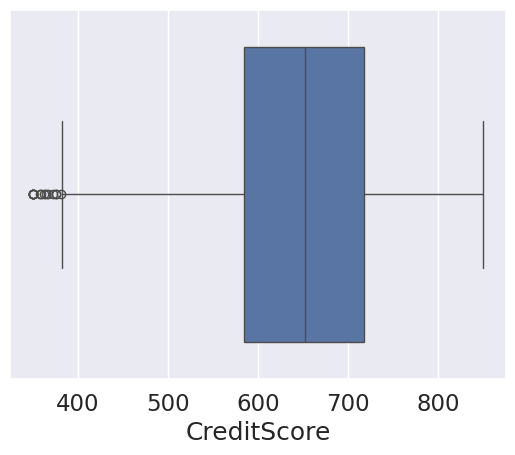

In [ ]:
sns.boxplot(x=data['CreditScore'])

<Axes: xlabel='Age'>

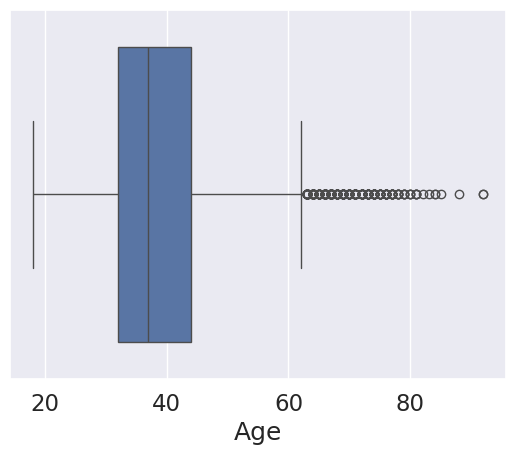

In [ ]:
sns.boxplot(x=data['Age'])

<Axes: xlabel='Balance'>

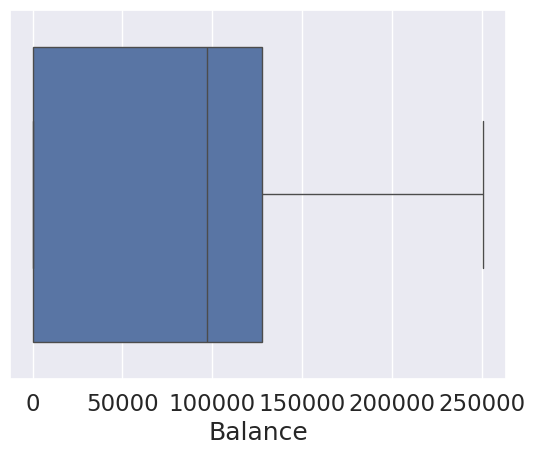

In [ ]:
sns.boxplot(x=data['Balance'])

<Axes: xlabel='EstimatedSalary'>

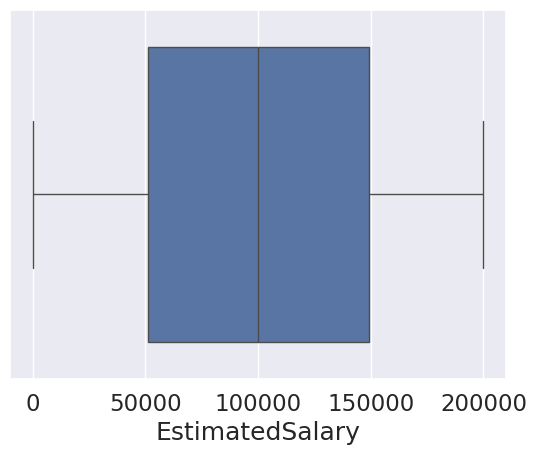

In [ ]:
sns.boxplot(x=data['EstimatedSalary'])

# **Exploratory Data Analysis** --- Kevin Morales

In [ ]:
data.shape

(10000, 11)

In [ ]:
duplicate_rows_data = data[data.duplicated()]
print("number of duplicate rows: ", duplicate_rows_data.shape)

number of duplicate rows:  (0, 11)


In [ ]:
data.count()

,0
CreditScore,10000
Geography,10000
Gender,10000
Age,10000
Tenure,10000
Balance,10000
NumOfProducts,10000
HasCrCard,10000
IsActiveMember,10000
EstimatedSalary,10000


In [ ]:
print(data.isnull().sum())

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


In [ ]:
data = data.dropna()
data.count()

,0
CreditScore,10000
Geography,10000
Gender,10000
Age,10000
Tenure,10000
Balance,10000
NumOfProducts,10000
HasCrCard,10000
IsActiveMember,10000
EstimatedSalary,10000


# **EDA BiVariado** --- Kevin Morales

# **CreditScore** --- Kevin Morales


In [ ]:
data['CreditScore'].describe()

,CreditScore
count,10000.000000
mean,650.528800
std,96.653299
min,350.000000
25%,584.000000
50%,652.000000
75%,718.000000
max,850.000000


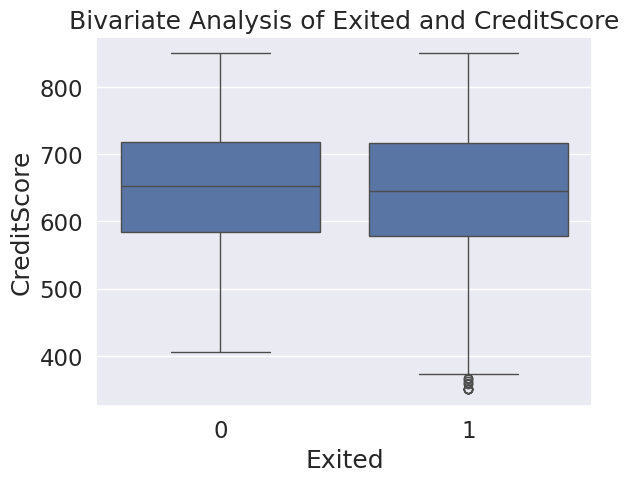

In [ ]:
sns.boxplot(x='Exited', y='CreditScore', data=data)
plt.title('Bivariate Analysis of Exited and CreditScore')
plt.xlabel('Exited')
plt.ylabel('CreditScore')
plt.show()

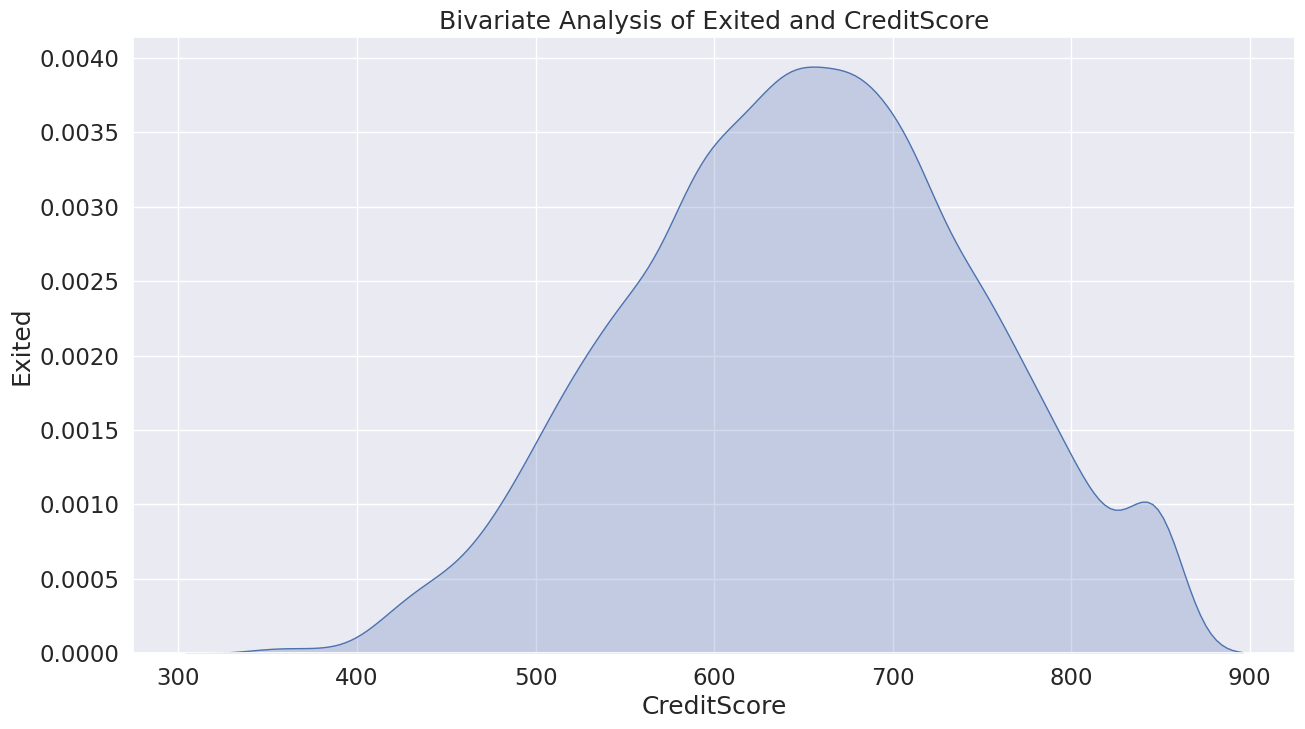

In [ ]:
plt.figure(figsize=(15,8))

sns.kdeplot(data['CreditScore'], fill=True, palette="Set2") # boxplot, densidad
plt.title('Bivariate Analysis of Exited and CreditScore')
plt.xlabel('CreditScore')
plt.ylabel('Exited')
plt.show()

# **Age** --- Kevin Morales

In [ ]:
data['Age'].describe()


,Age
count,10000.000000
mean,38.921800
std,10.487806
min,18.000000
25%,32.000000
50%,37.000000
75%,44.000000
max,92.000000


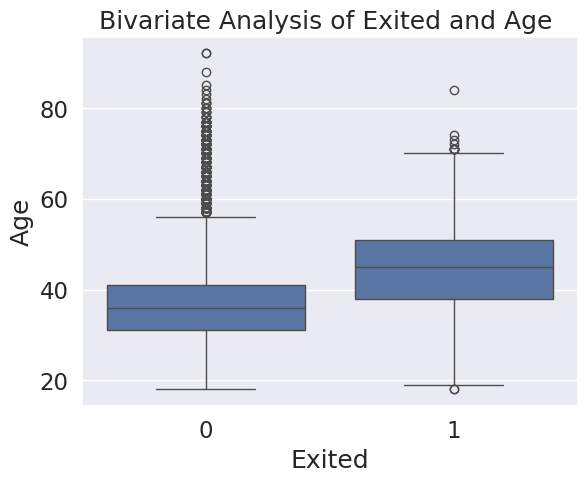

In [ ]:
sns.boxplot(x='Exited', y='Age', data=data)
plt.title('Bivariate Analysis of Exited and Age ')
plt.xlabel('Exited')
plt.ylabel('Age')
plt.show()

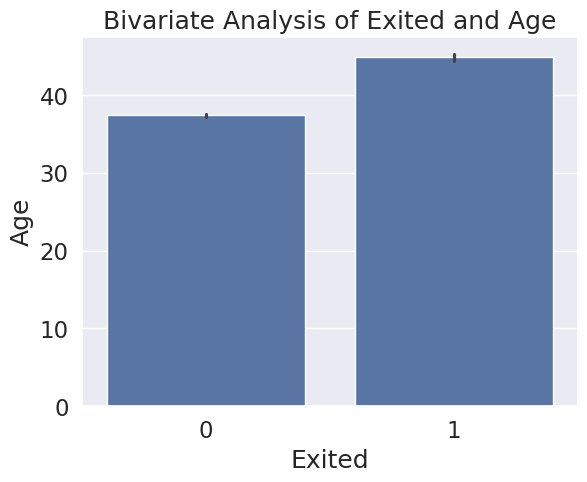

In [ ]:
sns.barplot(x='Exited', y='Age', data=data)
plt.title('Bivariate Analysis of Exited and Age')
plt.xlabel('Exited')
plt.ylabel('Age')
plt.show()

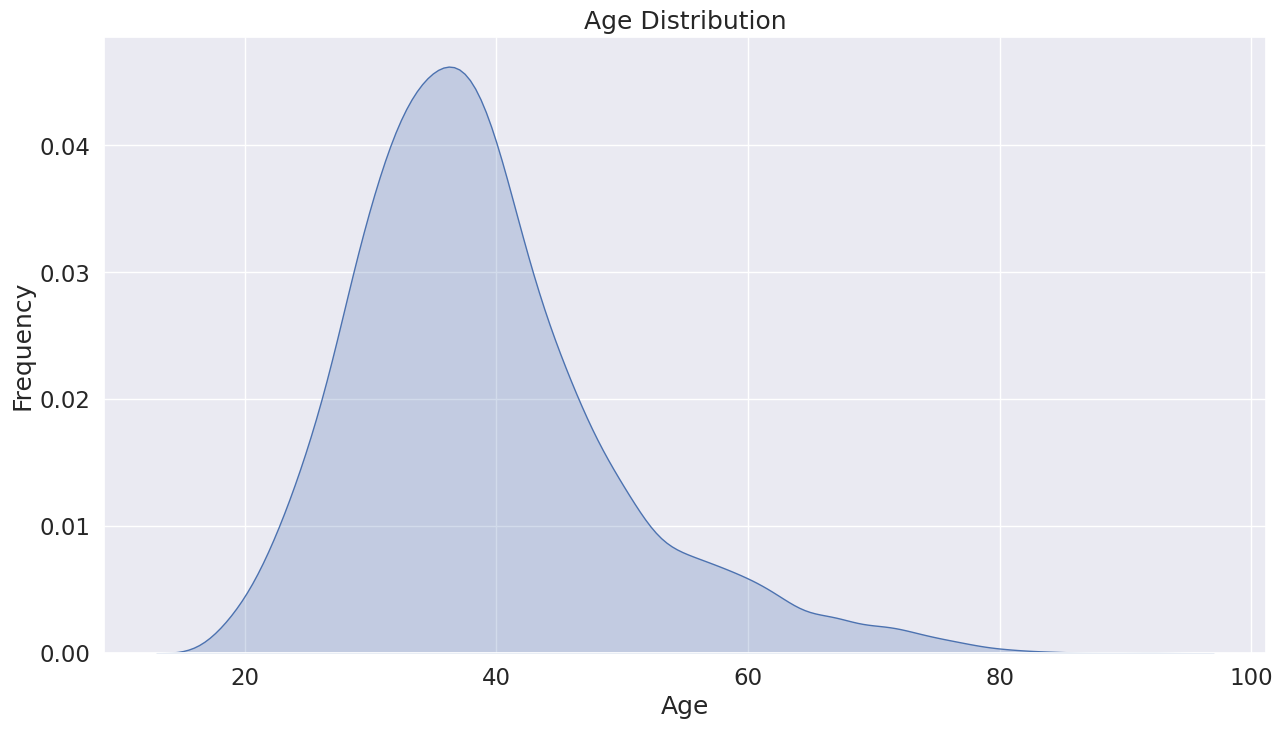

In [ ]:
plt.figure(figsize=(15, 8))

sns.kdeplot(data['Age'], fill=True, palette="Set2")
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.show()

# **NumOfProducts** --- Kevin Morales

In [ ]:
data["NumOfProducts"].value_counts()

,count
NumOfProducts,
1,5084
2,4590
3,266
4,60


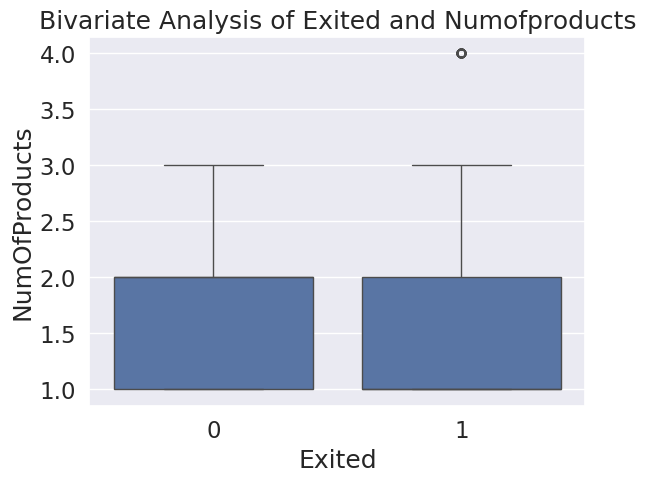

In [ ]:
sns.boxplot(x='Exited', y='NumOfProducts', data=data)
plt.title('Bivariate Analysis of Exited and Numofproducts')
plt.xlabel('Exited')
plt.ylabel('NumOfProducts')
plt.show()

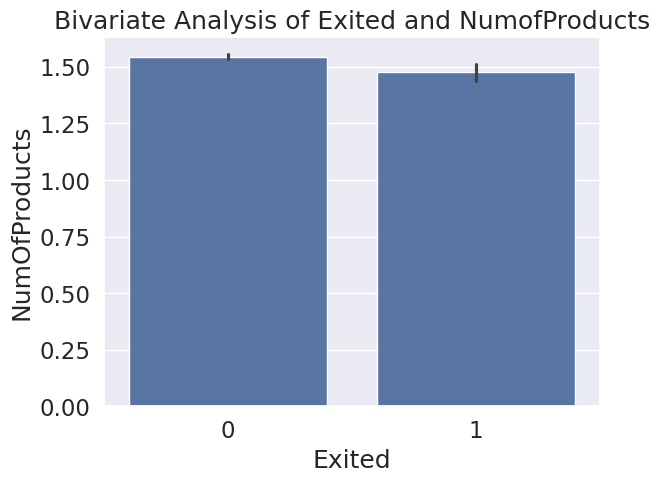

In [ ]:
sns.barplot(x='Exited', y='NumOfProducts', data=data)
plt.title('Bivariate Analysis of Exited and NumofProducts')
plt.xlabel('Exited')
plt.ylabel('NumOfProducts')
plt.show()

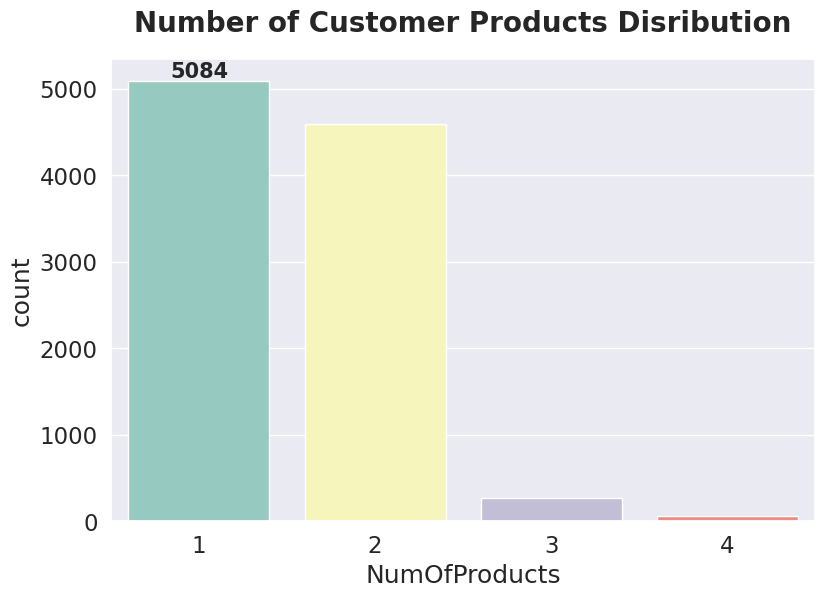

In [ ]:
count = data["NumOfProducts"].value_counts()

plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
ax=sns.countplot(data=data, x="NumOfProducts",palette="Set3")
ax.bar_label(ax.containers[0],fontweight="black",size=15)
plt.title("Number of Customer Products Disribution",fontweight="black",size=20,pad=20)

plt.show()

# **Estimated Salary** --- Kevin Morales

In [ ]:
data['EstimatedSalary'].describe()


,EstimatedSalary
count,10000.000000
mean,100090.239881
std,57510.492818
min,11.580000
25%,51002.110000
50%,100193.915000
75%,149388.247500
max,199992.480000


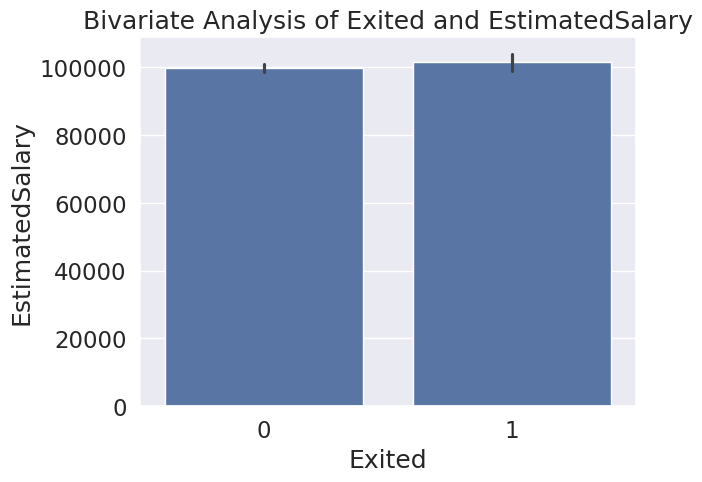

In [ ]:
sns.barplot(x='Exited', y='EstimatedSalary', data=data)
plt.title('Bivariate Analysis of Exited and EstimatedSalary')
plt.xlabel('Exited')
plt.ylabel('EstimatedSalary')
plt.show()

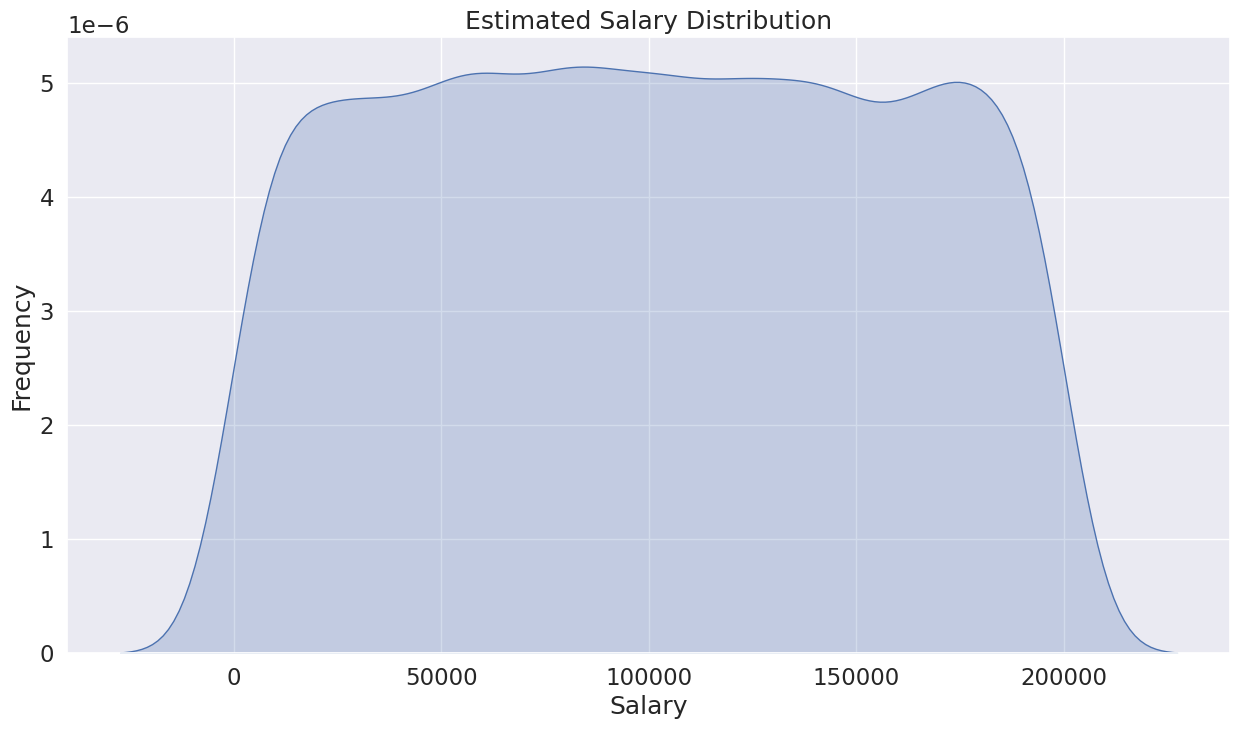

In [ ]:
plt.figure(figsize=(15, 8))

sns.kdeplot(data['EstimatedSalary'], fill=True, palette="Set2")
plt.title('Estimated Salary Distribution')
plt.xlabel('Salary')
plt.ylabel('Frequency')

plt.show()

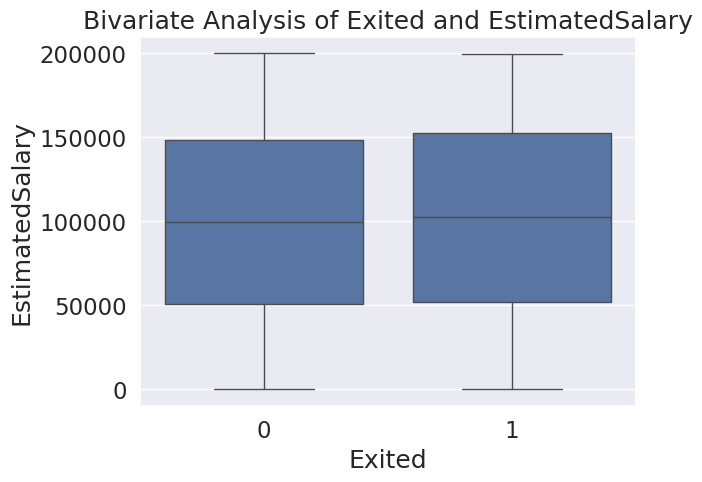

In [ ]:
sns.boxplot(x='Exited', y='EstimatedSalary', data=data)
plt.title('Bivariate Analysis of Exited and EstimatedSalary')
plt.xlabel('Exited')
plt.ylabel('EstimatedSalary')
plt.show()

# **Balance** --- Kevin Morales

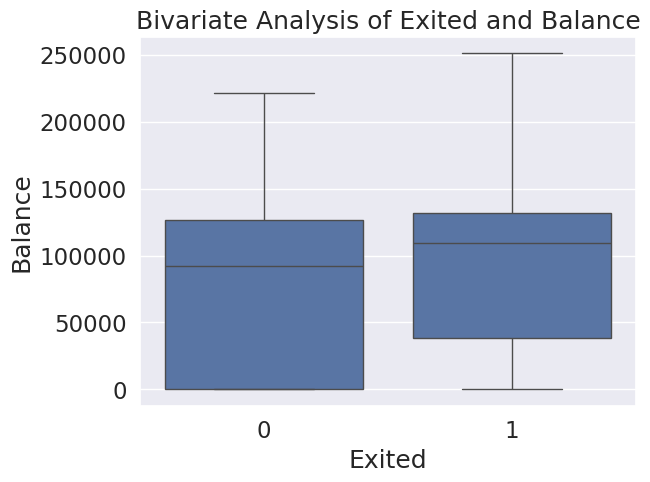

In [ ]:
sns.boxplot(x='Exited', y='Balance', data=data)
plt.title('Bivariate Analysis of Exited and Balance')
plt.xlabel('Exited')
plt.ylabel('Balance')
plt.show()

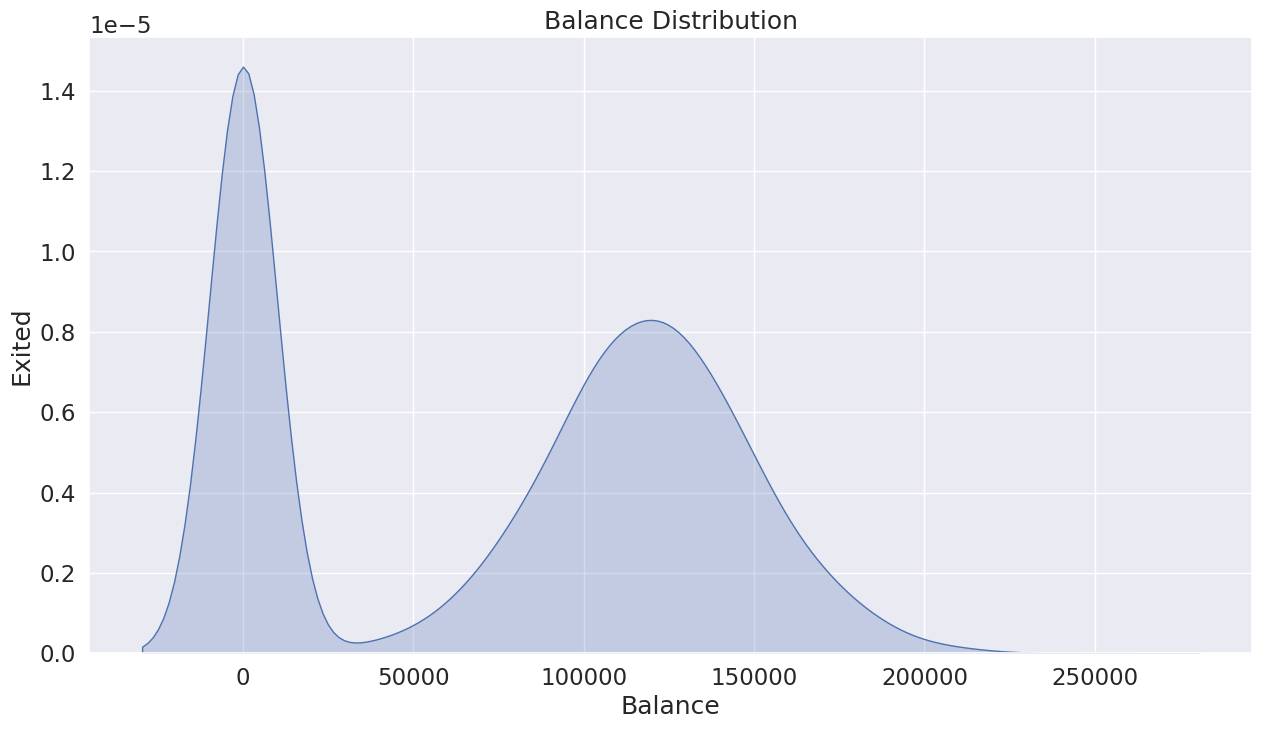

In [ ]:
plt.figure(figsize=(15, 8))

sns.kdeplot(data['Balance'], fill=True, palette="Set3")
plt.title('Balance Distribution')
plt.xlabel('Balance')
plt.ylabel('Exited')

plt.show()

# **EDA MultiVariado** --- Kevin Morales

# Multivariable Análisis

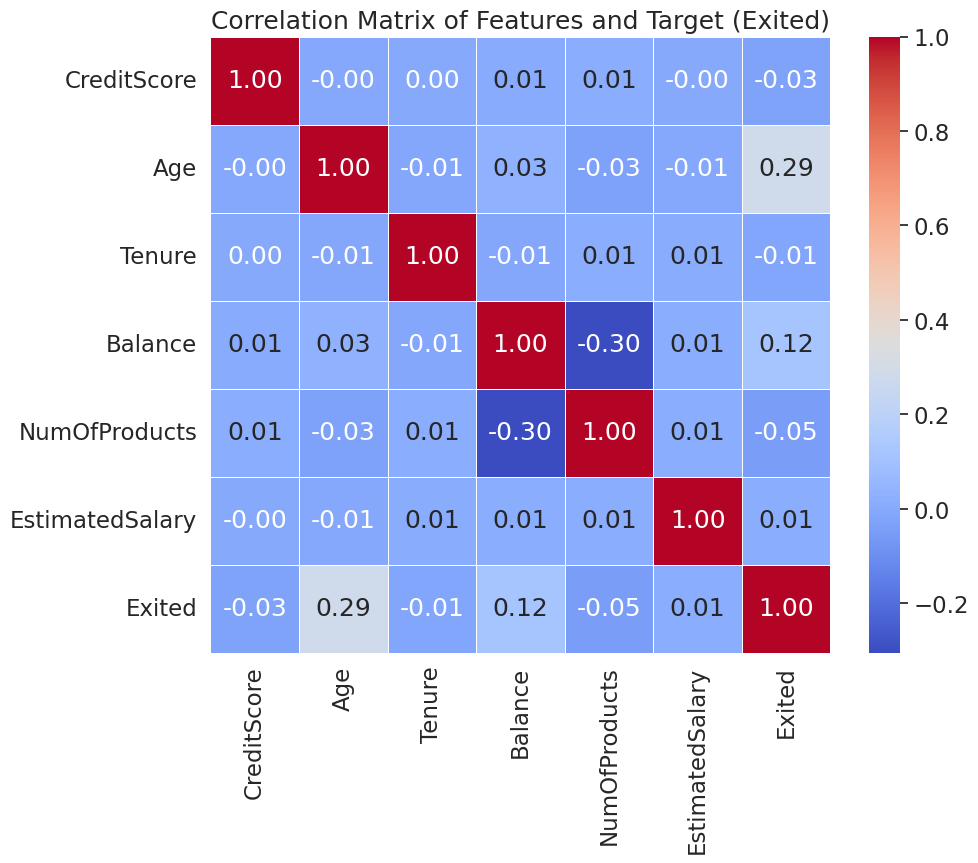

In [ ]:
# Include the target 'Exited' and numerical features for correlation analysis
numerical_features_with_target = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary', 'Exited']

# Compute the correlation matrix
correlation_matrix = data[numerical_features_with_target].corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Features and Target (Exited)')
plt.show()

# **3 Variable Graph CreditScore vs HasCard vs Exited** --- Kevin Morales

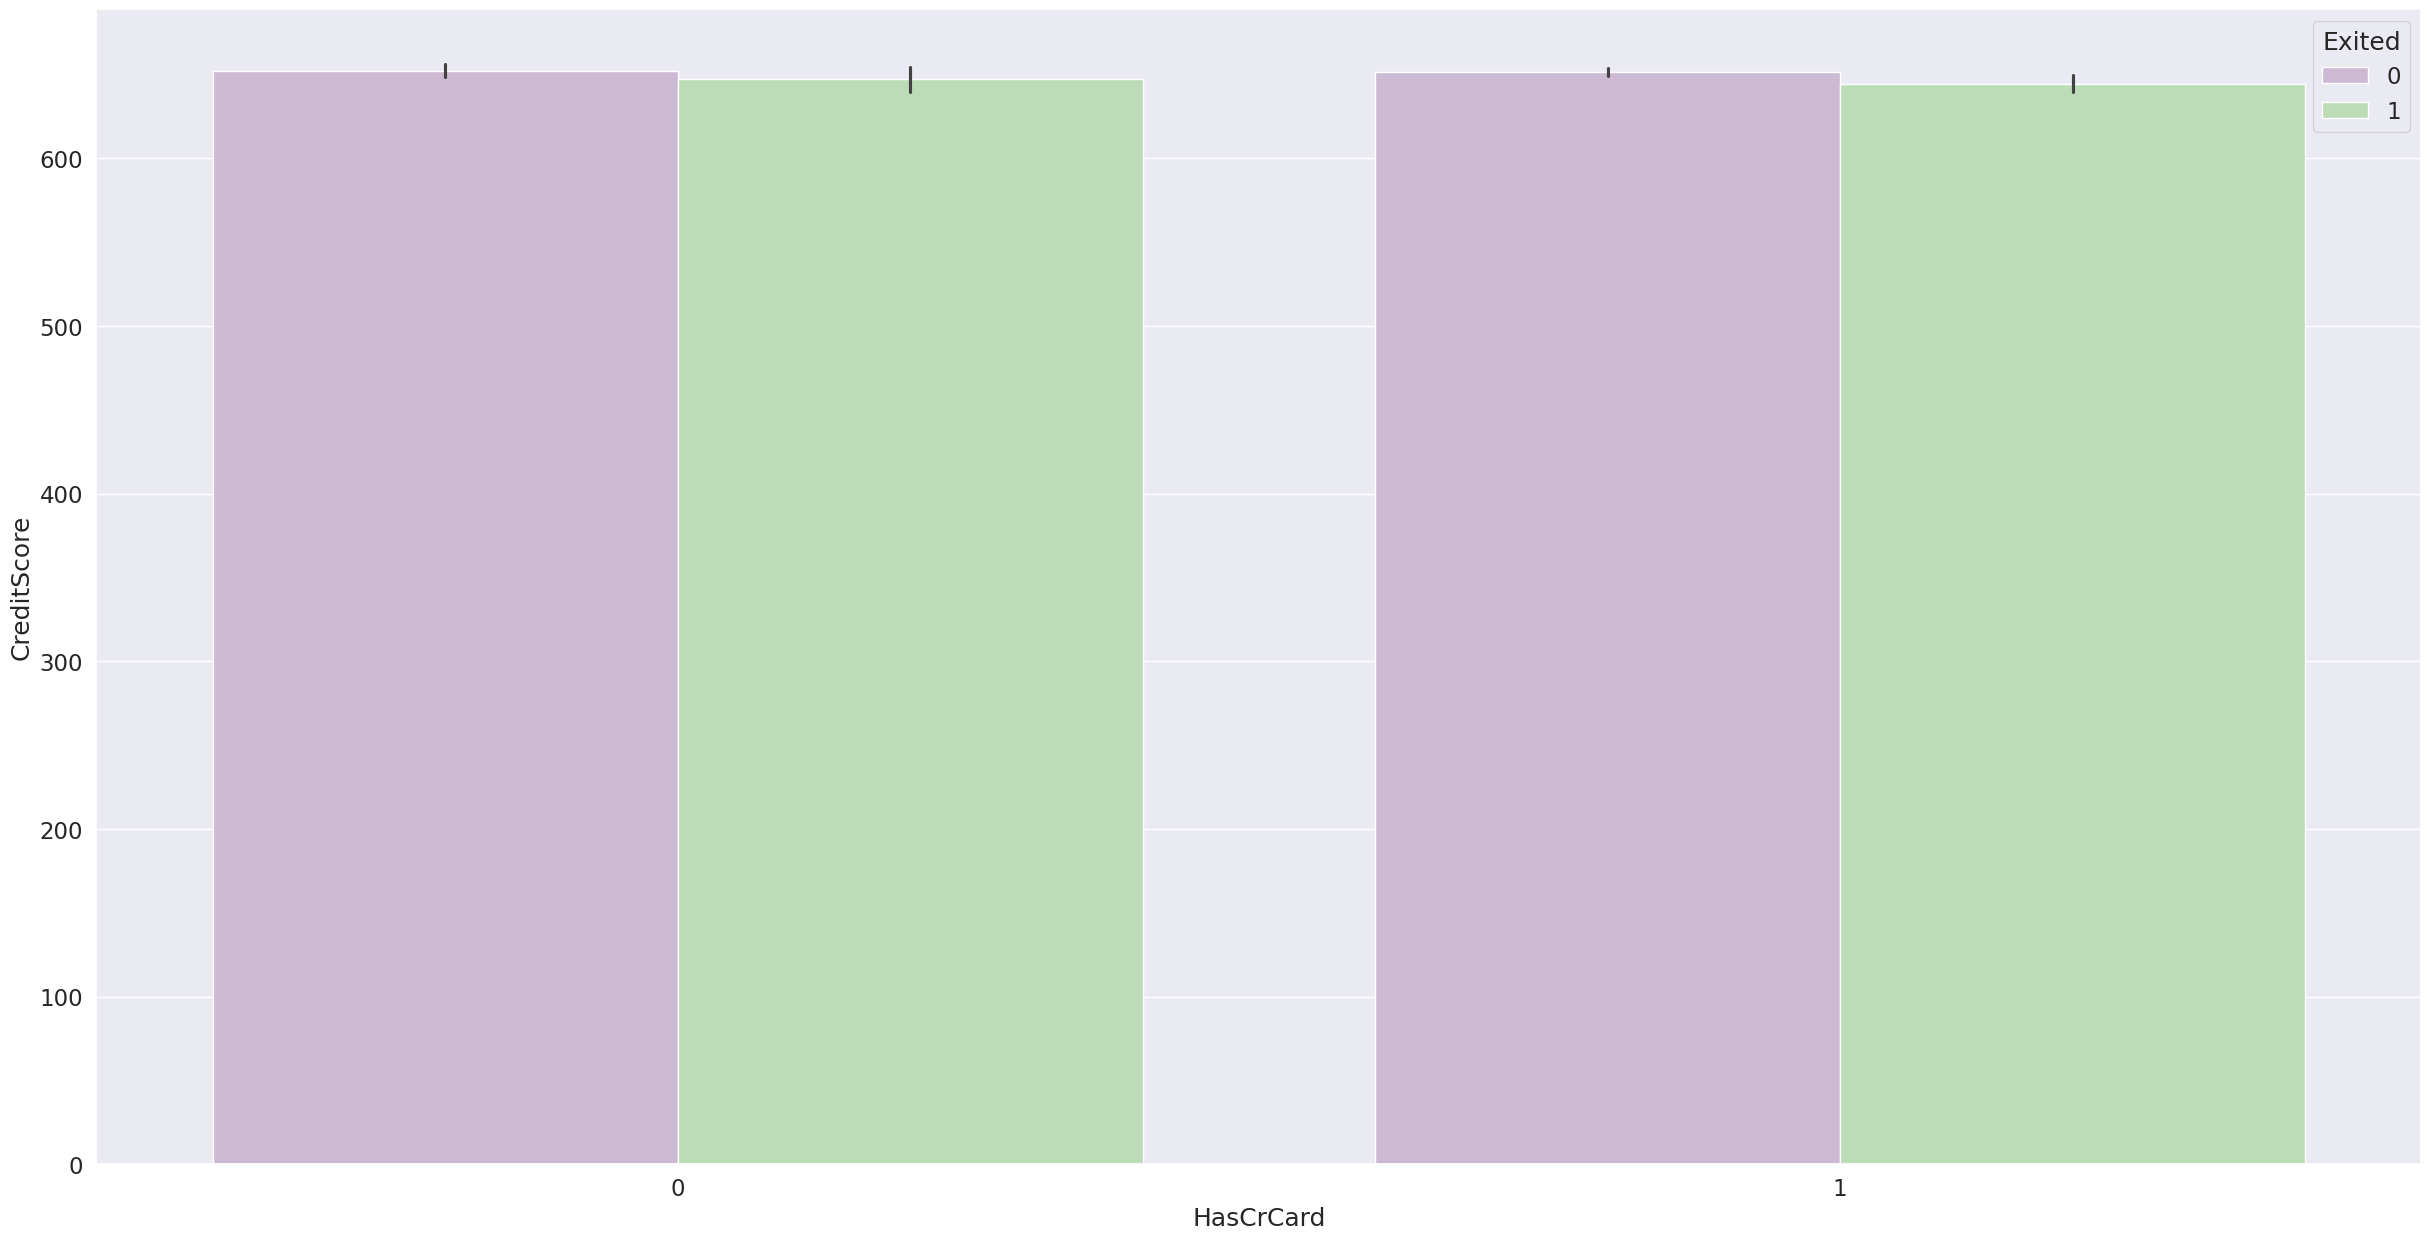

In [ ]:
f,ax = plt.subplots(figsize =(30,15))
sns.barplot(x="HasCrCard" , y="CreditScore", hue="Exited",data=data,palette="PRGn",ax=ax)
plt.show()

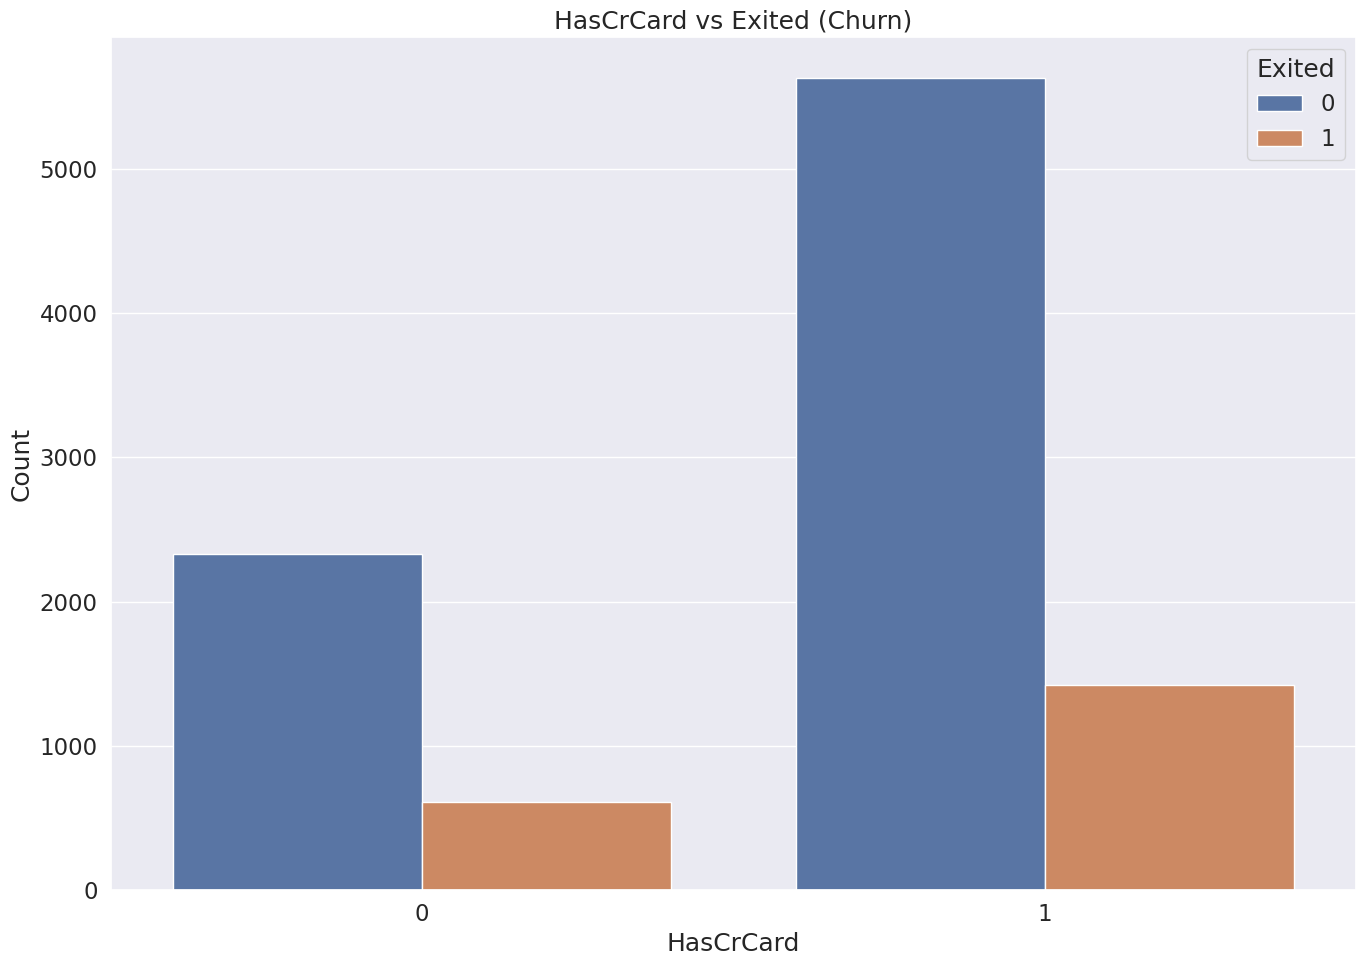

In [ ]:
plt.figure(figsize=(14, 10))

sns.countplot(x="HasCrCard", hue='Exited', data=data)
plt.title('HasCrCard vs Exited (Churn)')
plt.xlabel('HasCrCard')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

# **Modelamiento Kevin Morales**
Data Procesing

In [ ]:
# Define Features X and Target Y
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

In [ ]:
X = pd.get_dummies(X, columns=['Geography', 'Gender'], drop_first = False)

In [ ]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,True,False,False,True,False
1,608,41,1,83807.86,1,0,1,112542.58,False,False,True,True,False
2,502,42,8,159660.80,3,1,0,113931.57,True,False,False,True,False
3,699,39,1,0.00,2,0,0,93826.63,True,False,False,True,False
4,850,43,2,125510.82,1,1,1,79084.10,False,False,True,True,False


In [ ]:
#Data Scalling

scaler = StandardScaler()

numerical_cols = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

In [ ]:
#Data Splitting

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Data Balancing
# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data
X_train, y_train = smote.fit_resample(X_train, y_train)

# Check the new shapes of the resampled data
print("Resampled X_train shape:", X_train.shape)
print("Resampled y_train shape:", y_train.shape)

Resampled X_train shape: (12712, 13)
Resampled y_train shape: (12712,)


##  **Machine Learning Models**

## Random Forest

In [ ]:
RF_classifier = RandomForestClassifier(n_estimators=100, min_impurity_decrease=0.01)

RF_classifier.fit(X_train, y_train)

RandomForestClassifier(min_impurity_decrease=0.01)

In [ ]:
# Train score
RF_classifier.score(X_train, y_train)

0.7677784770295784

In [ ]:
# Test score
RF_classifier.score(X_test, y_test)

0.7715

In [ ]:
# Get prediction
y_pred = RF_classifier.predict(X_test)

In [ ]:
# Get our metrics
rf_acc = accuracy_score(y_test, y_pred)
rf_per = precision_score(y_test, y_pred)
rf_rec = recall_score(y_test, y_pred)

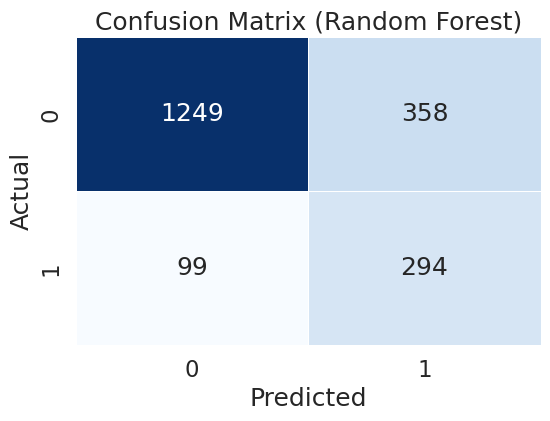

In [ ]:
# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix with a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', linewidths=.5, cbar=False)
plt.title('Confusion Matrix (Random Forest)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## XGB Classifier Model

In [ ]:
# Create XGBClassifier Model
XGB_classifier = XGBClassifier(n_estimators=200)

XGB_classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
# Train score
XGB_classifier.score(X_train, y_train)

0.9907960981749528

In [ ]:
# Test score
XGB_classifier.score(X_test, y_test)

0.85

In [ ]:
# Get prediction
y_pred_xgb = XGB_classifier.predict(X_test)

In [ ]:
# Get our metrics
xgb_acc = accuracy_score(y_test, y_pred_xgb)
xgb_per = precision_score(y_test, y_pred_xgb)
xgb_rec = recall_score(y_test, y_pred_xgb)

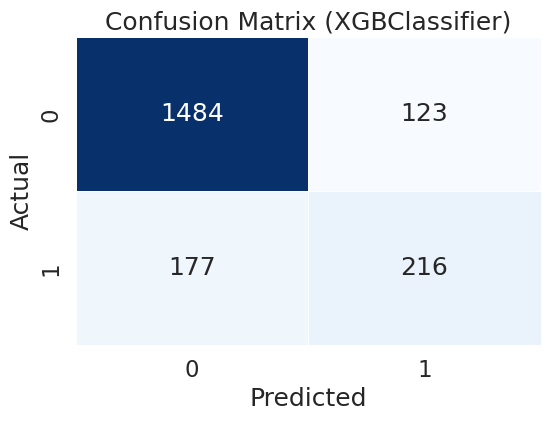

In [ ]:
# Create a confusion matrix for XGBClassifier
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)

# Visualize the confusion matrix with a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_xgb, annot=True, fmt='d', cmap='Blues', linewidths=.5, cbar=False)
plt.title('Confusion Matrix (XGBClassifier)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# **Evaluación** --- Kevin Morales

In [ ]:
Models = ['RandomForestClassifier','XGBoostClassifier']
Accuracy = [ rf_acc, xgb_acc]
Precision = [rf_per,  xgb_per]
Recall = [rf_rec, xgb_rec]

models = pd.DataFrame(data={'Models': Models,'Accuracy': Accuracy, 'Precision': Precision, 'Recall': Recall})
models

,Models,Accuracy,Precision,Recall
0,RandomForestClassifier,0.7795,0.461165,0.725191
1,XGBoostClassifier,0.8500,0.637168,0.549618
